# Python for DS Graded Project-2

## <font color='blue'> Table Of Contents </font>
- Problem Statement
- Load and explore data
- Data cleaning and preprocessing
- Exploratory Data Analysis

##  <font color='blue'> Problem Description </font>

## Context:
 Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience.
This is because it groups customers based on common characteristics.

● Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to spend their money in different ways, so brands need to be aware of who exactly is buying their product.

● Segmentation also focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating. Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people
## Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions. The collected data is of several categories. This dataset contains self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.)

## Dataset Description:
Based on the given users and items data of an e-commerce company, segment the similar user and items into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Questions: 
● Import the required libraries and load the data:
1. Load the required libraries and read the dataset. (1)
2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features (2)

● Data Cleaning and Exploratory data analysis :

3. Check if there are any duplicate records in the dataset? If any, drop them.(1)
4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) (1)
5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)
6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. (2)
7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)
8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)
9. Check the statistical summary for the numerical and categorical columns and write your findings. (3)
10. Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)
11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)

● Data Preparation for model building: 

12. Encode the categorical variables in the dataset. (1)
13. Standardize the data, so that the values are within a particular range. (1)

● Principal Component Analysis and Clustering: 

14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. (7)
15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)
a. Find the optimal K Value using elbow plot for K Means clustering.
b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
c. Compute silhouette score for evaluating the quality of the K Means clustering technique.
16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) (8)
a. Find the optimal K Value using dendrogram for Agglomerative clustering.
b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.
c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

● Conclusion : 

17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. (2)

# Load and explore data

* Importing neccessary libraries viewing and preprocessing Data.

## 1. Load the required libraries and read the dataset.

In [1]:
#Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.width",1000) #display
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [2]:
#Import data
runway = pd.read_csv("renttherunway.csv")
runway

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
#Examine info
runway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [4]:
#Describe the csv
runway.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [5]:
#Examine the rows of fifa
runway.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [6]:
#Examine the shape
print(runway.shape)

(192544, 16)


In [7]:
# First 5 sample
runway.sample(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
27344,27344,small,243034,32c,1734206,135lbs,10.0,other,Especially flattering for those with a small u...,pear,Very flattering!,dress,"5' 5""",12,29.0,"September 29, 2017"
134767,134767,fit,313419,34d,2649640,140lbs,10.0,everyday,I'm on the taller end and sometimes have troub...,full bust,"Very comfortable, great pattern, flattering",romper,"5' 9""",14,26.0,"August 28, 2016"
143140,143140,fit,775288,32b,144585,115lbs,8.0,date,Since my dresses came a day early I was able t...,petite,Easy and Fun,dress,"5' 5""",1,32.0,"February 17, 2014"
70371,70371,fit,246890,32b,644425,110lbs,10.0,other,Loved this dress so much! I ordered the S and ...,petite,Perfect for all of the events of the night!,sheath,"5' 3""",8,24.0,"May 17, 2015"
121518,121518,fit,711118,32c,136860,131lbs,6.0,wedding,"Overall I really liked this dress, although th...",pear,Fun pop of color and nice fit!,sheath,"5' 8""",8,38.0,"October 7, 2015"


# Data Cleaning and Exploratory data analysis

## 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [8]:
# Check if there are any duplicate records in the dataset? If any, drop them.

# Examine the shape of the DataFrame before duplicate removal
print(runway.shape)

(192544, 16)


In [9]:
# Is duplicates avaialble 
runway.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
192539    False
192540    False
192541    False
192542    False
192543    False
Length: 192544, dtype: bool

In [10]:
# Sum of duplicate
runway.duplicated().sum()

0

### Since there are no duplicates; No need to Remove the duplicate

## 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [11]:
runway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [12]:
# Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

# Examine the shape of the DataFrame
print(runway.shape)

# Drop the 'id' ,'review'  columns
col = ['bust size','user_id','review_text','review_summary','review_date','item_id']
runway_df = runway.drop(columns=col, axis=1)

# Examine the shape of the DataFrame (again)
print(runway_df.shape)

(192544, 16)
(192544, 10)


In [13]:
runway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  192544 non-null  int64  
 1   fit         192544 non-null  object 
 2   weight      162562 non-null  object 
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  object 
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 14.7+ MB


In [14]:
# drop Unnamed: 0 column
df = runway_df[['fit','weight','rating','rented for','body type','category','height','size','age']].copy()

In [15]:
print(df.shape)

(192544, 9)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   weight      162562 non-null  object 
 2   rating      192462 non-null  float64
 3   rented for  192534 non-null  object 
 4   body type   177907 non-null  object 
 5   category    192544 non-null  object 
 6   height      191867 non-null  object 
 7   size        192544 non-null  int64  
 8   age         191584 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 13.2+ MB


In [17]:
df

,fit,weight,rating,rented for,body type,category,height,size,age
0,fit,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...
192539,fit,140lbs,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,100lbs,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,135lbs,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,165lbs,10.0,wedding,pear,dress,"5' 6""",16,31.0


## 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [18]:
weight_df=df.copy()

In [19]:
# Convert the column "weight" to float datatype after getting rid of suffix lbs.
# - Note: When the record/entry has "lbs" as suffix just need to remove it
# - When the record/entry is null leave as it is

def fun_convert(x):
    if type(x) == str:
        x = x.strip()
        if x.endswith('lbs'):
            return x.replace('lbs', '')
    elif type(x) == float:
        return x
    else:
        x=''
        return x
df['weight']=df['weight'].apply(fun_convert).astype('float')
df


,fit,weight,rating,rented for,body type,category,height,size,age
0,fit,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...
192539,fit,140.0,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,100.0,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,135.0,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,165.0,10.0,wedding,pear,dress,"5' 6""",16,31.0


In [20]:
df.isnull().sum()

fit               0
weight        29982
rating           82
rented for       10
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

In [21]:
runway_df1=df['weight']
runway_df1

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

## 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'.

In [22]:
# Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. (2)
df['rented for'].value_counts()

wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: rented for, dtype: int64

In [23]:
# group 'party: cocktail' category with 'party'
df['rented for'] = df['rented for'].replace({'party: cocktail':'party'})

In [24]:
# Check the unique categories for the column 'rented for' after groupping 'party: cocktail' category with 'party'.
df['rented for'].value_counts()

wedding          57784
formal affair    40408
party            35627
everyday         16822
other            15388
work             15042
date              7388
vacation          4075
Name: rented for, dtype: int64

## 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [25]:
height_df=df['height']
height_df

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [26]:
# The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)
# Convert height from feets + inches to inches only 
def height_process(x):
    if type(x) == str:
        x = x.strip()
        if x.endswith('"'):
            x = x.replace('"', '')
        if "'" in x:
            temp = [float(t) for t in x.split("'")]
            return temp[0]*12+temp[1]
    elif type(x) == float:
        return x
    else:
        return 0
df['height'] = df['height'].apply(height_process)
df

,fit,weight,rating,rented for,body type,category,height,size,age
0,fit,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,NaN,10.0,party,NaN,sheath,64.0,4,116.0
3,fit,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...
192539,fit,140.0,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,100.0,10.0,work,petite,dress,61.0,4,29.0
192541,fit,135.0,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,165.0,10.0,wedding,pear,dress,66.0,16,31.0


In [27]:
height_df1=df['height']
height_df1

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

## 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [28]:
# Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)

# Missing Values Check
print("The existence of missing values in each column:")
df.isnull().any()

The existence of missing values in each column:


fit           False
weight         True
rating         True
rented for     True
body type      True
category      False
height         True
size          False
age            True
dtype: bool

In [29]:
# Count missing value
df.isna().sum()

fit               0
weight        29982
rating           82
rented for       10
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

### Impute null values

In [30]:
# Copy data set
impute_df = df.copy()

In [31]:
impute_df

,fit,weight,rating,rented for,body type,category,height,size,age
0,fit,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,NaN,10.0,party,NaN,sheath,64.0,4,116.0
3,fit,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...
192539,fit,140.0,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,100.0,10.0,work,petite,dress,61.0,4,29.0
192541,fit,135.0,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,165.0,10.0,wedding,pear,dress,66.0,16,31.0


In [32]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   weight      162562 non-null  float64
 2   rating      192462 non-null  float64
 3   rented for  192534 non-null  object 
 4   body type   177907 non-null  object 
 5   category    192544 non-null  object 
 6   height      191867 non-null  float64
 7   size        192544 non-null  int64  
 8   age         191584 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 13.2+ MB


In [33]:
# Apply mode & impute
cols = ['weight','rating','rented for','body type','height','age']

impute_df[cols]=impute_df[cols].fillna(impute_df.mode().iloc[0])
impute_df.isna().sum()

fit           0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [34]:
impute_df

,fit,weight,rating,rented for,body type,category,height,size,age
0,fit,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,130.0,10.0,party,hourglass,sheath,64.0,4,116.0
3,fit,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...
192539,fit,140.0,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,100.0,10.0,work,petite,dress,61.0,4,29.0
192541,fit,135.0,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,165.0,10.0,wedding,pear,dress,66.0,16,31.0


Null values are imputed

## 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [35]:
stat_df=impute_df.copy()

In [36]:
# Check the statistical summary for the numerical and categorical columns and write your findings. (3)

# Column Statistics (of numerical data)
stat_df.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,136.240709,9.092758,65.306013,12.245175,33.856703
std,20.300468,1.429862,2.659925,8.494877,8.040513
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,125.000000,8.000000,63.000000,8.000000,29.000000
50%,130.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


In [37]:
# List of categorical columns
stat_df.select_dtypes(include=['object']).columns.tolist()

['fit', 'rented for', 'body type', 'category']

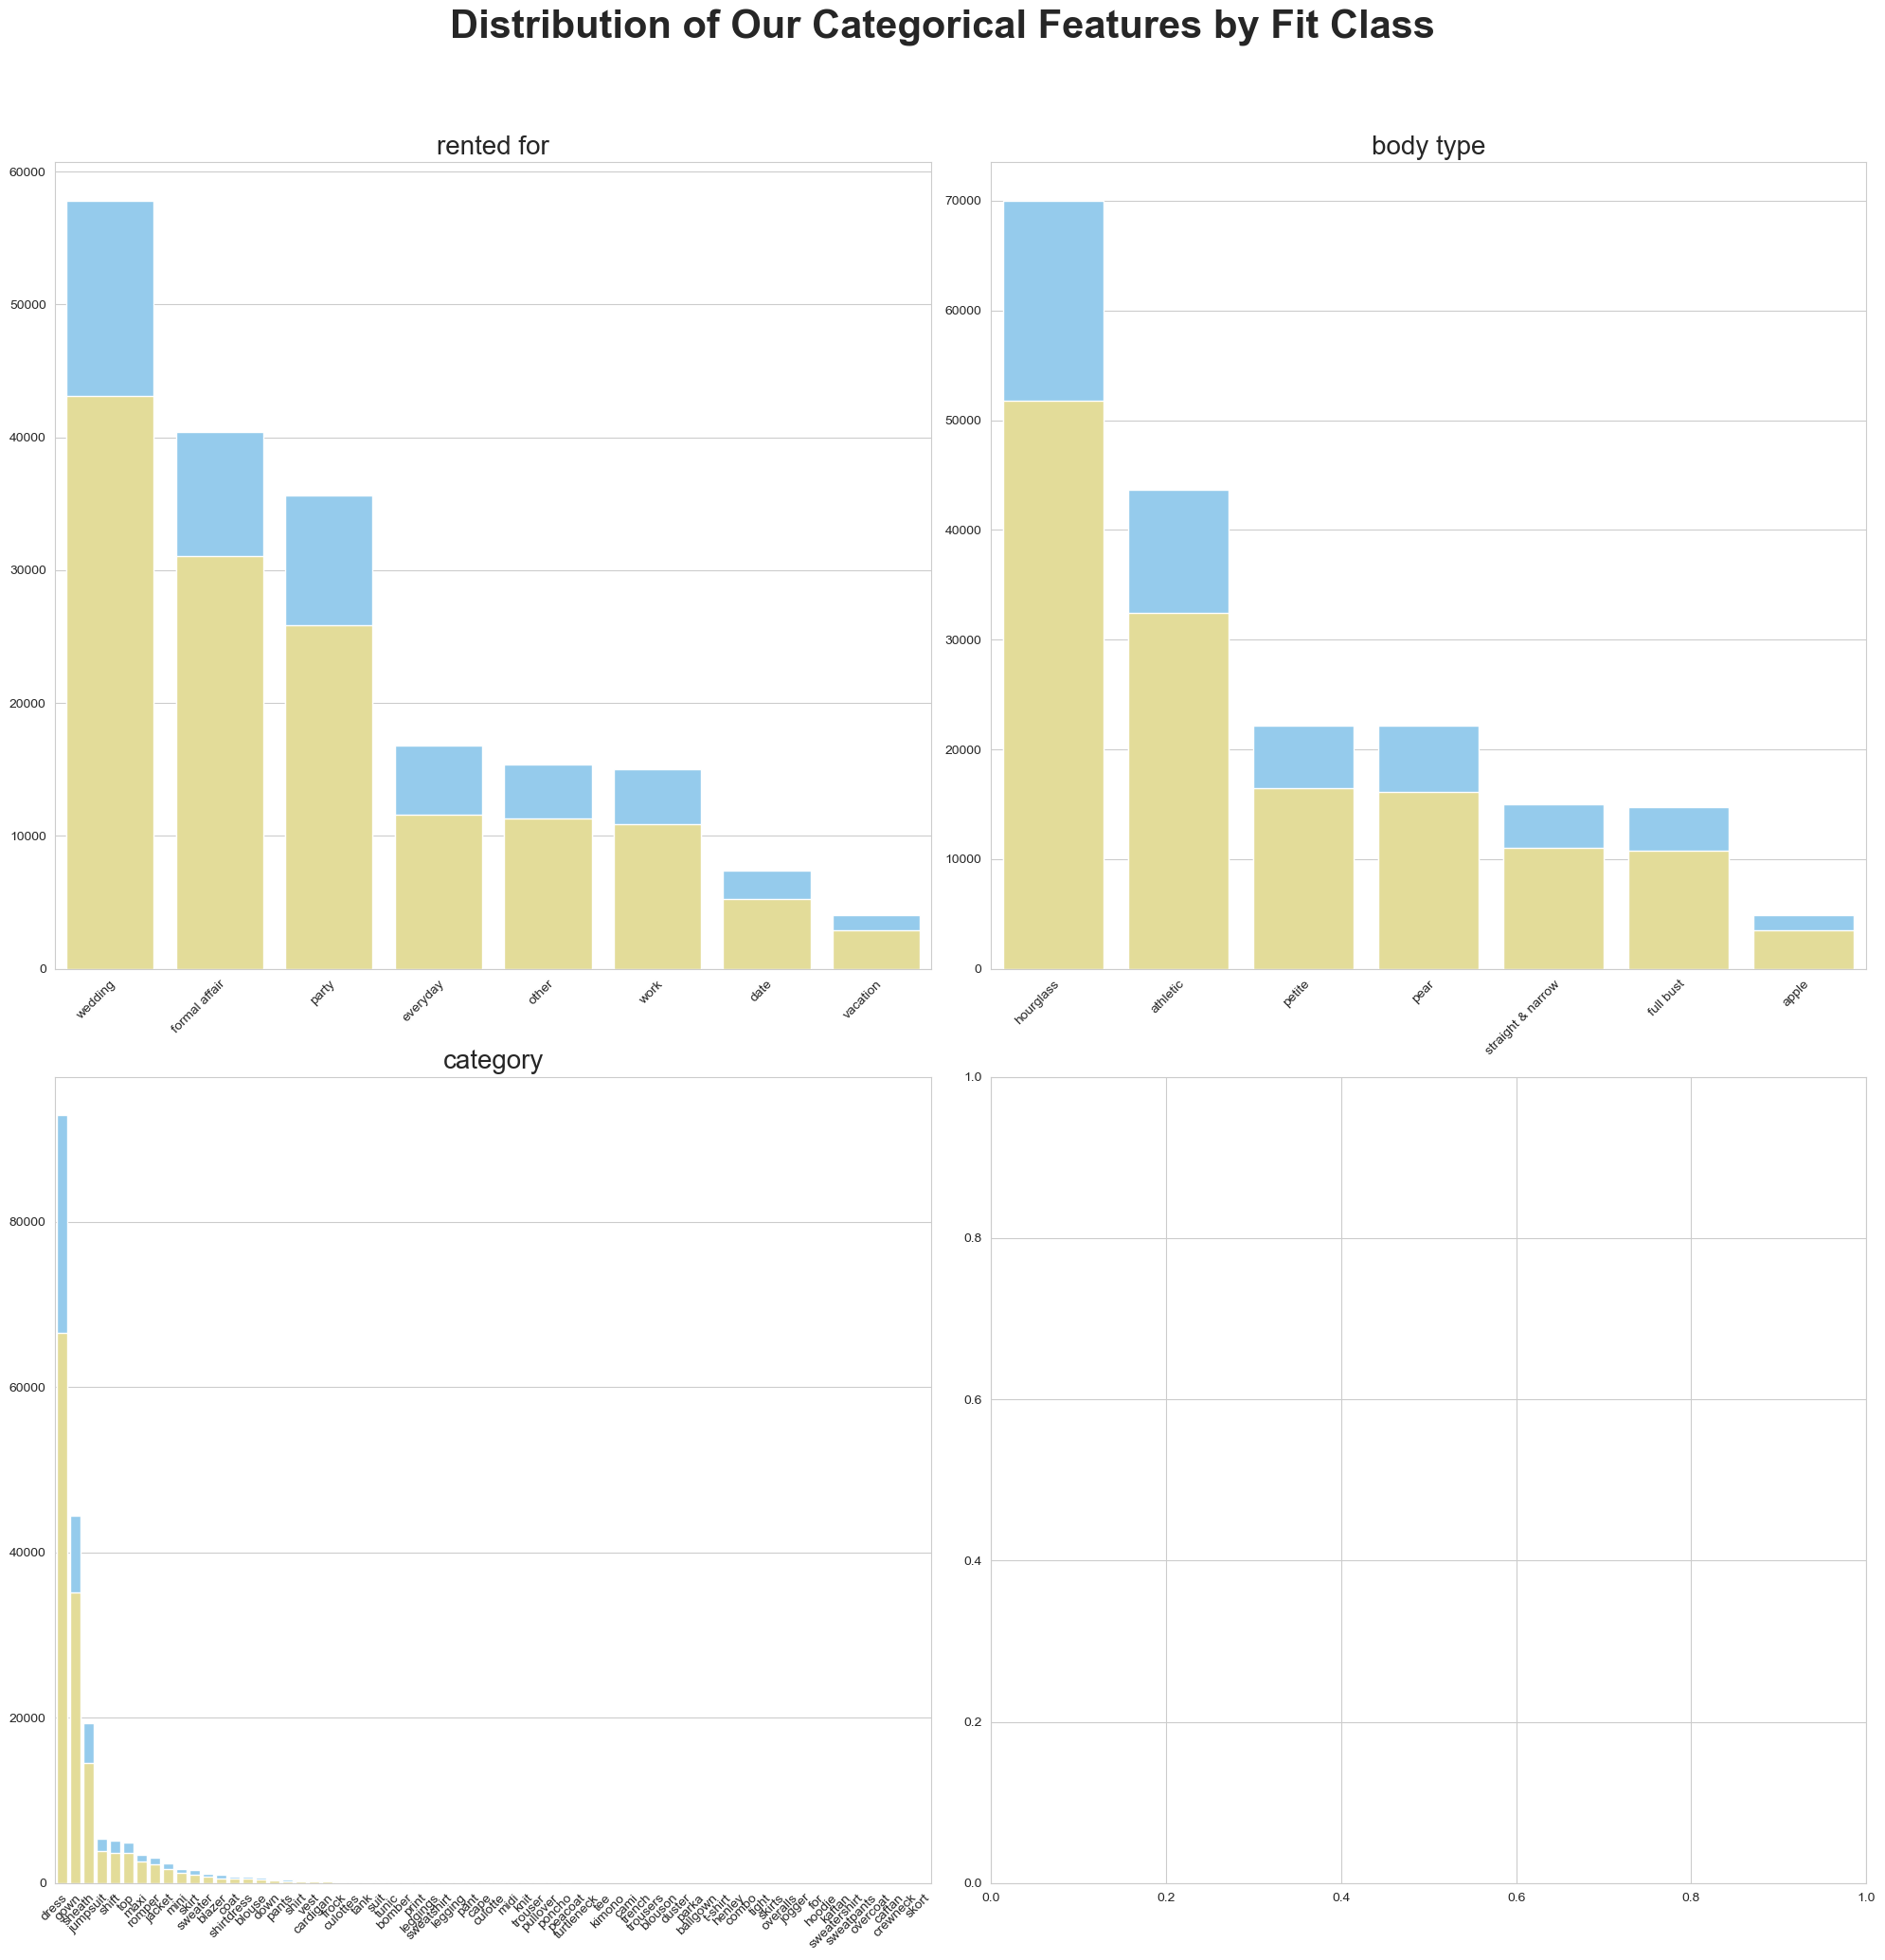

In [38]:
# Get a list of attributes to visualize
cat_cols_viz = ['rented for', 'body type', 'category']


# Set style
sns.set_style('whitegrid')

# Set up subplot to display graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20), sharex=False, sharey=False)
plt.suptitle('Distribution of Our Categorical Features by Fit Class', 
             fontsize=30, fontweight='bold', y=1.032)

# Initialize row and column index iterators in preparation for filling in the subplot
row_iterator = 0
col_iterator = 0

# Fill in the subplot
for col in cat_cols_viz:
    # Adjust indices once we reach the end of a row (moving from left to right)
    if col_iterator == 2:
        col_iterator = 0
        row_iterator = row_iterator + 1
    
    
    # Initialize value count series
    valCount_series = stat_df[col].value_counts()
    fit_valCount_series = stat_df[stat_df.fit=='fit'][col].value_counts()
    
    
    # Create the barplot (in blue) depicting customer count--by column
    sns.barplot(x=valCount_series.index, y=valCount_series.values, color='lightskyblue', ax=axes[row_iterator][col_iterator])
    
    # Create the barplot (in orange) depicting customer fit count--by column
    sns.barplot(x=fit_valCount_series.index, y=fit_valCount_series.values, color='khaki', ax=axes[row_iterator][col_iterator])

    # Label the graph
    axes[row_iterator][col_iterator].set_title('%s' % col, fontsize=20)
        
    # Rotate xlabels
    plt.sca(axes[row_iterator, col_iterator])
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')    
    
    # Increment row and column indices
    col_iterator = col_iterator + 1

    
# Adjust spacing of subplot
fig.tight_layout()

### Standard size of the customer is 7 and maximum size is 58.

### The dress category rented for wedding for the body type hourglass fits for most of the people.

## 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

In [39]:
outlierdf=stat_df.copy()

In [40]:
outlierdf

,fit,weight,rating,rented for,body type,category,height,size,age
0,fit,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,130.0,10.0,party,hourglass,sheath,64.0,4,116.0
3,fit,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...
192539,fit,140.0,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,100.0,10.0,work,petite,dress,61.0,4,29.0
192541,fit,135.0,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,165.0,10.0,wedding,pear,dress,66.0,16,31.0


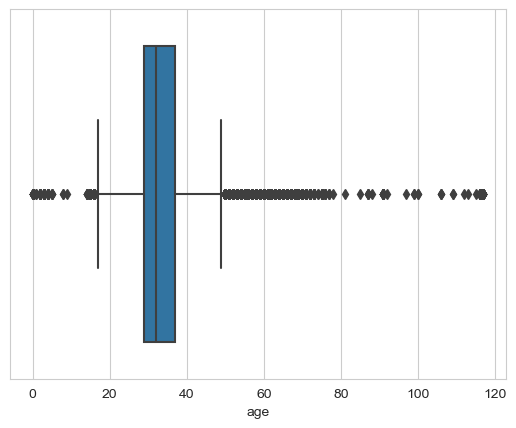

In [41]:
# Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)

# Check for the outliers present in the column 'age' - Box Plot
sns.boxplot(x=outlierdf['age'])
plt.savefig("outlierAge.png")

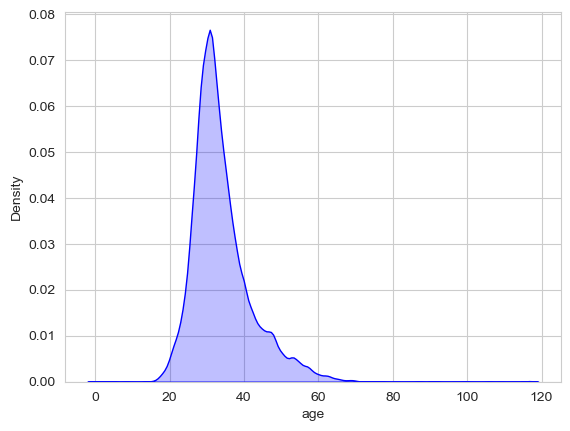

In [42]:
sns.kdeplot(outlierdf.age, color="blue", shade = True)
plt.savefig("kdeplotAge.png")

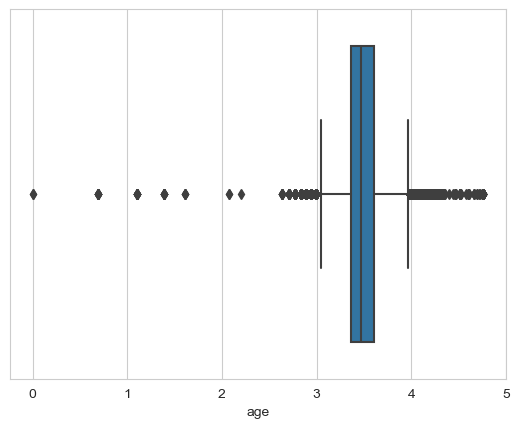

In [43]:
# Transform - After transformation - Box Plot
runway_log = outlierdf.copy()
runway_log['age']  = np.log(runway_log['age'])
sns.boxplot(x=runway_log['age'])
plt.savefig("afTransfAge.png")
plt.show()

### Use other method

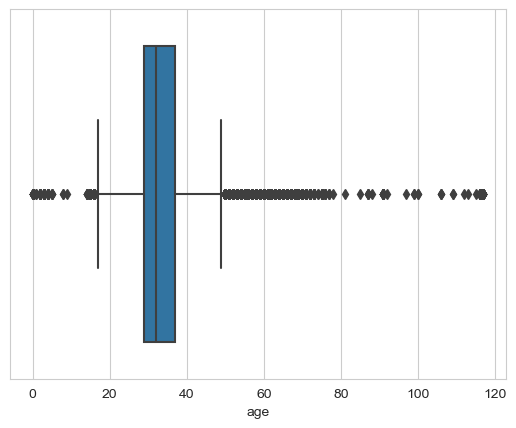

In [44]:
# Check for the outliers present in the column 'age' - Box Plot
sns.boxplot(x=outlierdf['age'])
plt.savefig("outlierAge1.png")

In [45]:
# Using IQR method - Removing outliers present in the column 'age'
Q1 = outlierdf['age'].quantile(0.25)
Q3 = outlierdf['age'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

29.0
37.0
8.0


In [46]:
# Lower & Upper whisker
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

17.0
49.0


In [47]:
# rows without outliers
age_out = outlierdf.loc[(outlierdf['age'] < upper_whisker) & (outlierdf['age'] > lower_whisker)] 
age_out.shape

(180708, 9)

<AxesSubplot:xlabel='age'>

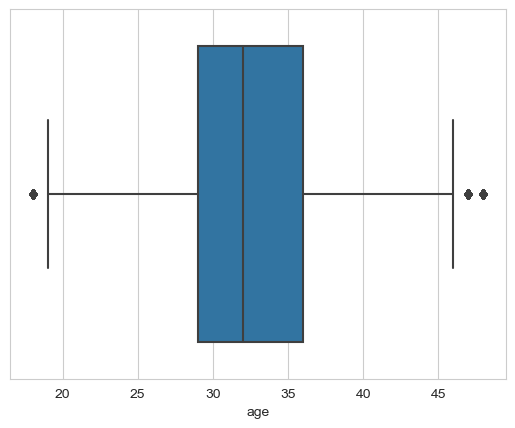

In [48]:
# Box plot after removing outliers
sns.boxplot(x=age_out.age)

### Using IQR we can remove the outliers

In [49]:
age_out

,fit,weight,rating,rented for,body type,category,height,size,age
0,fit,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
5,fit,138.0,8.0,date,athletic,dress,68.0,8,45.0
...,...,...,...,...,...,...,...,...,...
192539,fit,140.0,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,100.0,10.0,work,petite,dress,61.0,4,29.0
192541,fit,135.0,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,165.0,10.0,wedding,pear,dress,66.0,16,31.0


In [50]:
dist_df=age_out.copy()

In [51]:
dist_df

,fit,weight,rating,rented for,body type,category,height,size,age
0,fit,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
5,fit,138.0,8.0,date,athletic,dress,68.0,8,45.0
...,...,...,...,...,...,...,...,...,...
192539,fit,140.0,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,100.0,10.0,work,petite,dress,61.0,4,29.0
192541,fit,135.0,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,165.0,10.0,wedding,pear,dress,66.0,16,31.0


## 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

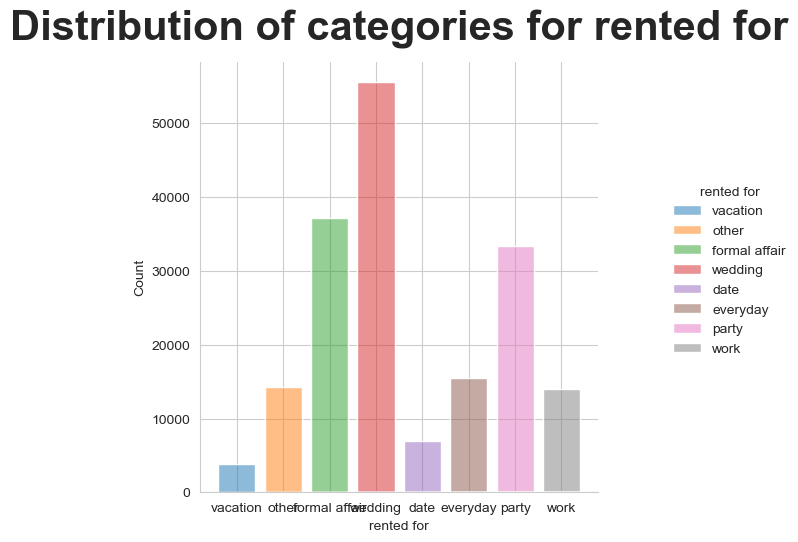

In [52]:
# Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)

# Distribution of categories for rented for
sns.displot(dist_df, x="rented for",color='y',shrink=.8,hue="rented for")

plt.title("Distribution of categories for rented for" ,fontsize=30, fontweight='bold', y=1.032)
plt.savefig("Distribution.png")
plt.show()


# Data Preparation for model building

In [53]:
dist_df.isna().sum()

fit           0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [54]:
dist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180708 entries, 0 to 192543
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         180708 non-null  object 
 1   weight      180708 non-null  float64
 2   rating      180708 non-null  float64
 3   rented for  180708 non-null  object 
 4   body type   180708 non-null  object 
 5   category    180708 non-null  object 
 6   height      180708 non-null  float64
 7   size        180708 non-null  int64  
 8   age         180708 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 17.8+ MB


In [55]:
encode_df=dist_df.copy()

In [56]:
encode_df

,fit,weight,rating,rented for,body type,category,height,size,age
0,fit,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
5,fit,138.0,8.0,date,athletic,dress,68.0,8,45.0
...,...,...,...,...,...,...,...,...,...
192539,fit,140.0,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,100.0,10.0,work,petite,dress,61.0,4,29.0
192541,fit,135.0,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,165.0,10.0,wedding,pear,dress,66.0,16,31.0


## 12. Encode the categorical variables in the dataset.

In [57]:
#Get list of categorical variables
s = (encode_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['fit', 'rented for', 'body type', 'category']


In [58]:
# 12. Encode the categorical variables in the dataset. (1)
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    encode_df[i]=encode_df[[i]].apply(LE.fit_transform)

In [59]:
encode_df

,fit,weight,rating,rented for,body type,category,height,size,age
0,0,137.0,10.0,5,3,44,68.0,14,28.0
1,0,132.0,10.0,3,6,20,66.0,12,36.0
3,0,135.0,8.0,2,4,16,65.0,8,34.0
4,0,145.0,10.0,6,1,20,69.0,12,27.0
5,0,138.0,8.0,0,1,16,68.0,8,45.0
...,...,...,...,...,...,...,...,...,...
192539,0,140.0,10.0,7,3,26,69.0,8,42.0
192540,0,100.0,10.0,7,5,16,61.0,4,29.0
192541,0,135.0,6.0,1,6,16,68.0,8,31.0
192542,0,165.0,10.0,6,4,16,66.0,16,31.0


In [60]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180708 entries, 0 to 192543
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         180708 non-null  int32  
 1   weight      180708 non-null  float64
 2   rating      180708 non-null  float64
 3   rented for  180708 non-null  int32  
 4   body type   180708 non-null  int32  
 5   category    180708 non-null  int32  
 6   height      180708 non-null  float64
 7   size        180708 non-null  int64  
 8   age         180708 non-null  float64
dtypes: float64(4), int32(4), int64(1)
memory usage: 15.1 MB


In [61]:
nacheck=encode_df.isna().sum()
nacheck

fit           0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

## 13. Standardize the data, so that the values are within a particular range.

In [62]:
# 13. Standardize the data, so that the values are within a particular range. (1)
standard_df = encode_df.select_dtypes(include=['int','float'])
from sklearn.preprocessing import StandardScaler
#Scaling
scaler = StandardScaler()
scaler.fit(standard_df)
scaleddf = pd.DataFrame(scaler.transform(standard_df),columns= standard_df.columns )
print("All features are now scaled")

All features are now scaled


In [63]:
scaleddf

,fit,weight,rating,rented for,body type,category,height,size,age
0,-0.556736,0.044812,0.636115,0.502722,0.016734,1.578752,1.009164,0.233744,-0.769099
1,-0.556736,-0.202840,0.636115,-0.468186,1.926154,-0.304791,0.259297,-0.004575,0.586256
2,-0.556736,-0.054249,-0.766053,-0.953639,0.653207,-0.618715,-0.115637,-0.481212,0.247417
3,-0.556736,0.441057,0.636115,0.988176,-1.256213,-0.304791,1.384098,-0.004575,-0.938518
4,-0.556736,0.094343,-0.766053,-1.924547,-1.256213,-0.618715,1.009164,-0.481212,2.111030
...,...,...,...,...,...,...,...,...,...
180703,-0.556736,0.193404,0.636115,1.473629,0.016734,0.166095,1.384098,-0.481212,1.602772
180704,-0.556736,-1.787818,0.636115,1.473629,1.289681,-0.618715,-1.615372,-0.957850,-0.599680
180705,-0.556736,-0.054249,-2.168221,-1.439093,1.926154,-0.618715,1.009164,-0.481212,-0.260841
180706,-0.556736,1.431667,0.636115,0.988176,0.653207,-0.618715,0.259297,0.472062,-0.260841


# Principal Component Analysis and Clustering: 

## 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [64]:
# 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. (7)

scaledds=scaleddf.copy()

In [65]:
scaledds

,fit,weight,rating,rented for,body type,category,height,size,age
0,-0.556736,0.044812,0.636115,0.502722,0.016734,1.578752,1.009164,0.233744,-0.769099
1,-0.556736,-0.202840,0.636115,-0.468186,1.926154,-0.304791,0.259297,-0.004575,0.586256
2,-0.556736,-0.054249,-0.766053,-0.953639,0.653207,-0.618715,-0.115637,-0.481212,0.247417
3,-0.556736,0.441057,0.636115,0.988176,-1.256213,-0.304791,1.384098,-0.004575,-0.938518
4,-0.556736,0.094343,-0.766053,-1.924547,-1.256213,-0.618715,1.009164,-0.481212,2.111030
...,...,...,...,...,...,...,...,...,...
180703,-0.556736,0.193404,0.636115,1.473629,0.016734,0.166095,1.384098,-0.481212,1.602772
180704,-0.556736,-1.787818,0.636115,1.473629,1.289681,-0.618715,-1.615372,-0.957850,-0.599680
180705,-0.556736,-0.054249,-2.168221,-1.439093,1.926154,-0.618715,1.009164,-0.481212,-0.260841
180706,-0.556736,1.431667,0.636115,0.988176,0.653207,-0.618715,0.259297,0.472062,-0.260841


In [66]:
scaledds.isna().sum()

fit           0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [67]:
scaledds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180708 entries, 0 to 180707
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         180708 non-null  float64
 1   weight      180708 non-null  float64
 2   rating      180708 non-null  float64
 3   rented for  180708 non-null  float64
 4   body type   180708 non-null  float64
 5   category    180708 non-null  float64
 6   height      180708 non-null  float64
 7   size        180708 non-null  float64
 8   age         180708 non-null  float64
dtypes: float64(9)
memory usage: 12.4 MB


In [68]:
# Covariance
cove_matrix= np.cov(scaledds.T)
print('Covariance Matrix','\n',cove_matrix)

Covariance Matrix 
 [[ 1.00000553e+00  1.51105655e-02 -2.44090046e-01  7.47746521e-03
  -8.24831996e-03  4.95014247e-04 -9.03905797e-05  6.57965058e-02
  -1.89782330e-03]
 [ 1.51105655e-02  1.00000553e+00 -2.14666830e-02  9.33084106e-03
  -2.32500902e-01 -1.66313760e-02  3.45538539e-01  6.97710017e-01
   7.17331526e-02]
 [-2.44090046e-01 -2.14666830e-02  1.00000553e+00  1.25616781e-02
   5.23807058e-03 -2.41411139e-02  1.30216925e-03 -3.78498020e-02
  -5.03021550e-02]
 [ 7.47746521e-03  9.33084106e-03  1.25616781e-02  1.00000553e+00
  -1.12609444e-02 -5.88133470e-02 -1.74305446e-02  6.53692565e-03
  -1.84110942e-02]
 [-8.24831996e-03 -2.32500902e-01  5.23807058e-03 -1.12609444e-02
   1.00000553e+00 -2.00483979e-03 -1.35476409e-01 -2.16178253e-01
  -4.65166432e-02]
 [ 4.95014247e-04 -1.66313760e-02 -2.41411139e-02 -5.88133470e-02
  -2.00483979e-03  1.00000553e+00 -5.24327689e-03 -8.76620868e-03
   2.18861823e-02]
 [-9.03905797e-05  3.45538539e-01  1.30216925e-03 -1.74305446e-02
  -1.354

In [69]:
## Calculating eigen values and eigen vectors
eig_vals1, eig_vecs1 = np.linalg.eig(cove_matrix)
print('Eigen vectors:','\n',eig_vecs1)
print('\n')
print('Eigen values:','\n',eig_vals1)

Eigen vectors: 
 [[-6.26146497e-02 -4.98486796e-02  6.80595441e-01  6.66598617e-01
  -1.78899686e-01  1.73539867e-01 -1.51233601e-01  3.21031670e-02
  -2.69186259e-03]
 [-6.13338686e-01 -7.21919264e-01 -6.40620475e-02 -1.12199268e-01
  -2.20880788e-01  2.49756036e-02 -4.03193445e-02 -1.86360649e-01
  -1.36955255e-02]
 [ 5.67340452e-02 -6.97137054e-03 -6.99458004e-01  6.61423139e-01
  -2.60909925e-01 -2.67978988e-02  2.01334983e-02 -1.78296376e-02
   2.22533128e-02]
 [-4.43790919e-03  5.04863469e-03 -4.34276052e-02 -7.25168046e-03
   1.21828881e-01  6.53184367e-01  3.32256954e-01 -1.62018540e-01
   6.47981086e-01]
 [ 3.19938597e-01 -1.00115760e-02  5.72759270e-02 -1.19267438e-02
  -7.00823975e-02  3.12638168e-05 -3.33210650e-02 -9.22127223e-01
  -1.94360057e-01]
 [ 1.23266614e-02 -5.83795590e-03  9.63905818e-02  3.59193162e-02
  -3.89174525e-02 -6.53632146e-01 -1.56184988e-01 -1.33303151e-01
   7.19944164e-01]
 [-3.81569368e-01  1.27254529e-01 -1.16633377e-01  2.27814680e-01
   7.840871

In [70]:
## Calculating the Variance explained and the cummulative variance explained
total1 = sum(eig_vals1)
var_exp1 = [ (i1/total1)*100  for i1 in sorted(eig_vals1,reverse=True)]
cum_var_exp1 = np.cumsum(var_exp1)
print('Variance Explained: ',var_exp1)
print('Cummulative Variance Explained: ',cum_var_exp1)

Variance Explained:  [22.54969312344238, 13.875157257684034, 11.886071872831021, 11.089448374556845, 10.480683411601929, 9.765886106267724, 8.866336189821485, 8.286490369739425, 3.2002332940551637]
Cummulative Variance Explained:  [ 22.54969312  36.42485038  48.31092225  59.40037063  69.88105404
  79.64694015  88.51327634  96.79976671 100.        ]


- We can see that approximately 90-95% of variance is explained by the first 8 variables.
- so, we can choose the optimal number of principal components as 8.

In [71]:
## Fitting the PCA model
from sklearn.decomposition import PCA
pca=PCA(n_components = 8)
pca.fit(scaledds)

PCA(n_components=8)

In [72]:
data_pca1 = pca.transform(scaledds)
data_pca1 = pd.DataFrame(data_pca1,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.354772,-0.906469,0.538530,0.970391,1.541792,0.524751,-0.421689,-0.144885
1,-0.635435,-0.667291,0.419002,-0.336346,-0.974664,1.733056,-0.157888,-0.224290
2,-0.526341,0.219885,0.381478,-0.043749,-1.227236,0.266422,-0.331729,0.825668
3,1.009749,-1.273983,-1.083423,0.779756,0.756818,-0.732517,-0.896062,-0.115913
4,0.849368,0.242651,1.622669,-0.956568,-1.804455,-1.305883,-1.687714,0.165446


In [73]:
dataPcaCsv=pd.DataFrame(data_pca1)
print(dataPcaCsv)

             PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
0       0.354772 -0.906469  0.538530  0.970391  1.541792  0.524751 -0.421689 -0.144885
1      -0.635435 -0.667291  0.419002 -0.336346 -0.974664  1.733056 -0.157888 -0.224290
2      -0.526341  0.219885  0.381478 -0.043749 -1.227236  0.266422 -0.331729  0.825668
3       1.009749 -1.273983 -1.083423  0.779756  0.756818 -0.732517 -0.896062 -0.115913
4       0.849368  0.242651  1.622669 -0.956568 -1.804455 -1.305883 -1.687714  0.165446
...          ...       ...       ...       ...       ...       ...       ...       ...
180703  0.503928 -0.850111 -0.227319 -1.384858  0.804314  0.604256 -1.754217 -0.718055
180704 -2.829632 -0.652471 -1.383629 -0.703979  0.469725  0.537488  0.617498  0.205053
180705 -0.494872  1.100533  0.469532  1.010907 -1.790908  1.511113 -1.297158  1.615101
180706  0.953857 -1.039503 -1.064592 -0.165402  0.082484  1.092780  0.329471  0.186597
180707  1.234477 -1.107847 -0.904262 -0.057

In [74]:
dataPcaCsv.to_csv('rentedRunWay_datapca.csv')

## 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) 

a. Find the optimal K Value using elbow plot for K Means clustering.

In [75]:
pcadf=pd.read_csv("rentedRunWay_datapca.csv")

In [76]:
# 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8) a. Find the optimal K Value using elbow plot for K Means clustering. b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot. c. Compute silhouette score for evaluating the quality of the K Means clustering technique.
from sklearn.cluster import KMeans

cluster_range1 = range(1,22)
cluster_errors1 = []

for num_clusters1 in cluster_range1:
   
    clusters1 = KMeans(num_clusters1, n_init=8)
    clusters1.fit(pcadf)
    
    labels1 = clusters1.labels_
    centroids1 = clusters1.cluster_centers_
    
    cluster_errors1.append(clusters1.inertia_)

clusters_df1 = pd.DataFrame({'num_clusters':cluster_range1, 
                           'cluster_errors':cluster_errors1})

clusters_df1

,num_clusters,cluster_errors
0,1,4.917574e+14
1,2,1.229397e+14
2,3,5.464205e+13
3,4,3.073920e+13
4,5,1.967264e+13
5,6,1.366802e+13
6,7,1.004099e+13
7,8,7.686915e+12
8,9,6.075088e+12
9,10,4.936743e+12


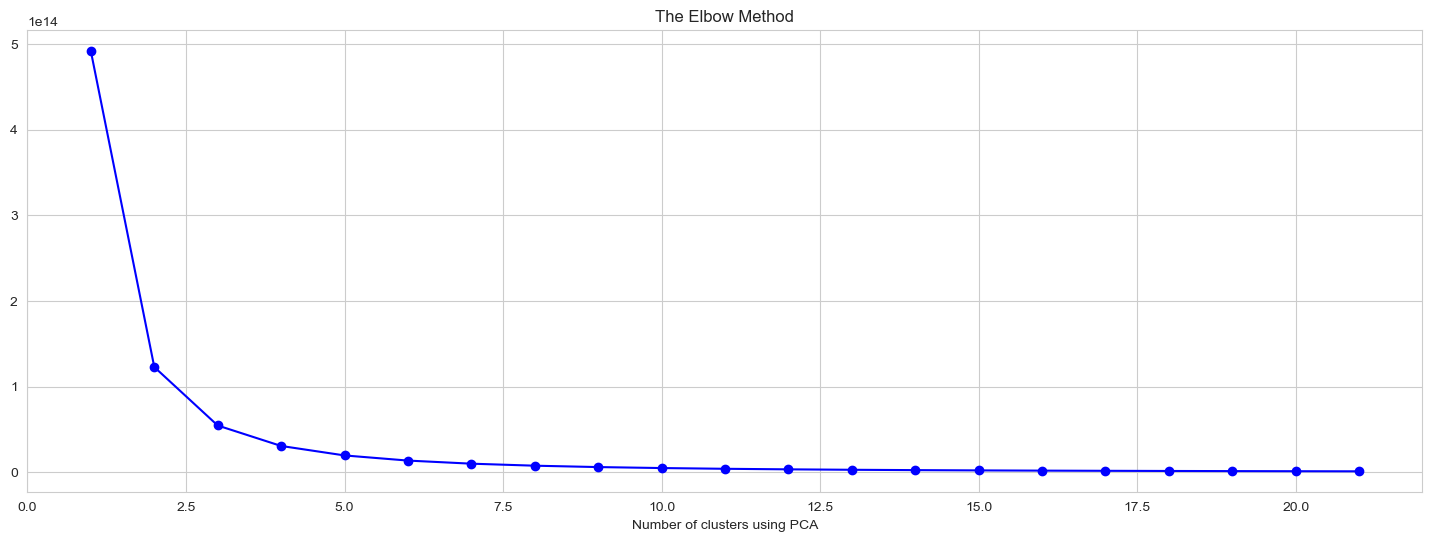

In [77]:
## Elbow method
plt.figure(figsize=[18,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df1['num_clusters'],clusters_df1['cluster_errors'],marker='o',color='b')
plt.show()

From the Elbow plot, we can see that at K=3 the interia starts to drop significantly. So we will do it using 3 clusters.
The clusters are labeled as 0,1,2.

b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

In [80]:
pcaSample= pcadf.sample(100)

In [81]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans2 = KMeans(n_clusters=3, n_init=22, random_state=2345)
kmeans2.fit(pcaSample)

KMeans(n_clusters=3, n_init=22, random_state=2345)

In [82]:
## obtained labels from kmeans clustering
kmeans2.labels_

array([1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1,
       1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       1, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1])

In [83]:
## Creating a new dataframe only for labels.
df_labels2 = pd.DataFrame(kmeans2.labels_, columns=list(['Labels']))
df_labels2.head(3)

,Labels
0,1
1,0
2,0


In [84]:
pcaSample.shape

(100, 9)

In [85]:
pcaSample.to_csv('rentedRunWay_datapca_bfs.csv')

In [86]:
pcaSample=pd.read_csv('rentedRunWay_datapca_bfs.csv')

c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [87]:
from sklearn.metrics import silhouette_score

kmeans_score1 = []

for i1 in range(2,22):
    kmeans2 = KMeans(n_clusters=i1)
    kmeans2 = kmeans2.fit(pcaSample)
    labels2 = kmeans2.predict(pcaSample)
    print(i1,silhouette_score(pcaSample,labels2))

2 0.6162446112558334
3 0.6336256814586934
4 0.6223193439706383
5 0.6167195355133436
6 0.5998215442856132
7 0.5915374215476019
8 0.5735861419923323
9 0.5812113288867988
10 0.574069295715188
11 0.582000813291913
12 0.5894010648057079
13 0.5914698515020049
14 0.5708491843575665
15 0.5875203470832737
16 0.585630776529028
17 0.5894763938864717
18 0.5805400440206363
19 0.6099923689352453
20 0.6082426395631388
21 0.6228717212667408


#### From above, we can observe that for 3 clusters the silhoutte score is highest, we can choose optimal clusters as 3.

In [88]:
silhouette_pcadf1 = pcaSample.copy()

In [89]:
silhouette_pcadf1.to_csv('rentedRunWay_silhouette_pcadf1.csv')

In [90]:
sil_pcadf1=pd.read_csv("rentedRunWay_silhouette_pcadf1.csv")

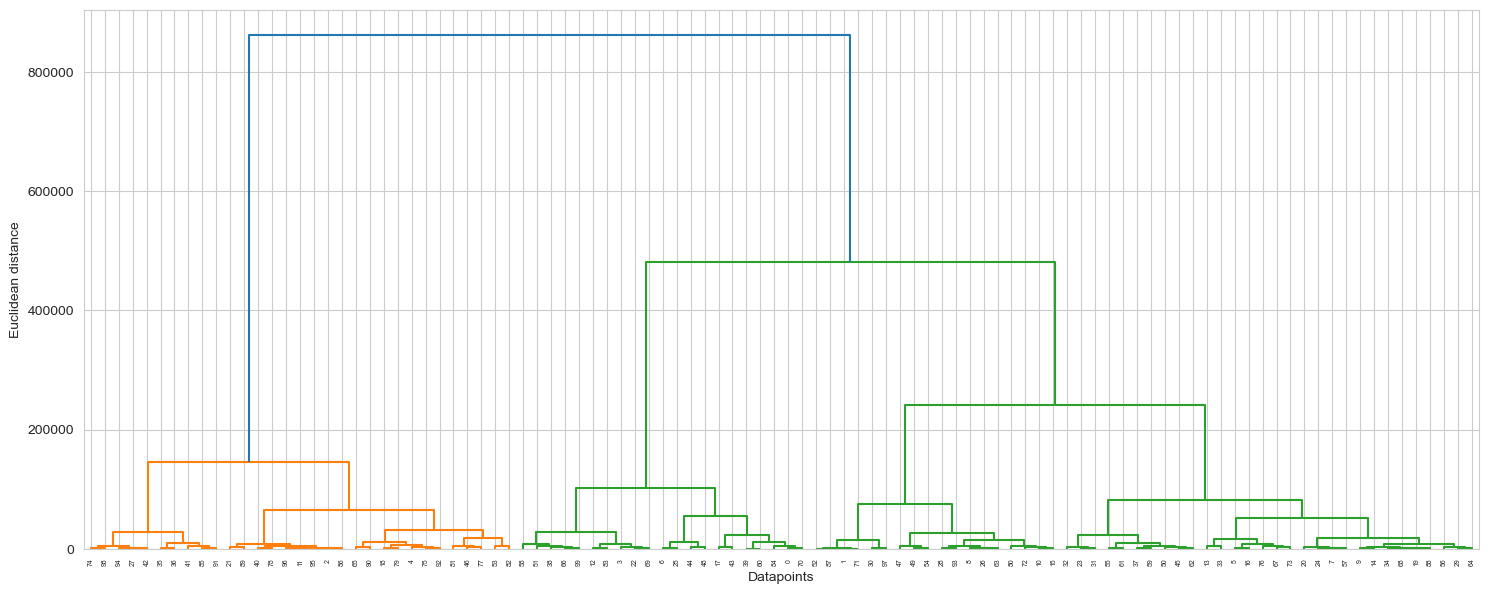

In [91]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

plt.figure(figsize=[18,7])
merg1 = linkage(sil_pcadf1, method='ward')
dendrogram(merg1, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

## 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data)

a. Find the optimal K Value using dendrogram for Agglomerative clustering

b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.

c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [92]:
## Building hierarchical clustering model using the optimal clusters as 5
from sklearn.cluster import AgglomerativeClustering
hie_cluster2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model2 = hie_cluster2.fit(sil_pcadf1)

In [93]:
## Creating a dataframe of the labels
df_label2 = pd.DataFrame(hie_cluster_model2.labels_,columns=['Labels'])
df_label2.head(5)

,Labels
0,0
1,3
2,2
3,0
4,2


In [96]:
for i2 in range(2,28):
    hier2 = AgglomerativeClustering(n_clusters=i2)
    hier2 = hier2.fit(sil_pcadf1)
    labels2 = hier2.fit_predict(sil_pcadf1)
    print(i2,silhouette_score(sil_pcadf1,labels2))

2 0.5985406733511113
3 0.622417571884012
4 0.620101666678789
5 0.6101306003827414
6 0.5741967873117882
7 0.5298026964978578
8 0.5504909434024953
9 0.5473087279678741
10 0.5612647415869663
11 0.5786717291432157
12 0.572742052534199
13 0.571219984606682
14 0.5757707330773324
15 0.5711937355677275
16 0.580905033054762
17 0.5822446701804452
18 0.5808133468224541
19 0.5878852371443477
20 0.5880112920522308
21 0.6046591698182122
22 0.6195490026449658
23 0.6294300649655105
24 0.6257786518681673
25 0.6352967770720741
26 0.6359501804949568
27 0.6348988529857347


From above, we can observe that the silhouette score is highest for 26.

# Conclusion

## 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

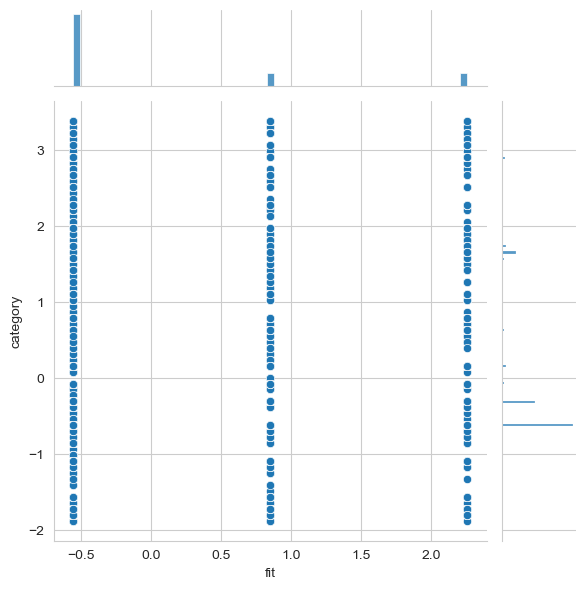

In [97]:
sns.jointplot(scaledds['fit'], scaledds['category']) ### annotate function of stats is to print correlation value

<AxesSubplot:xlabel='fit', ylabel='body type'>

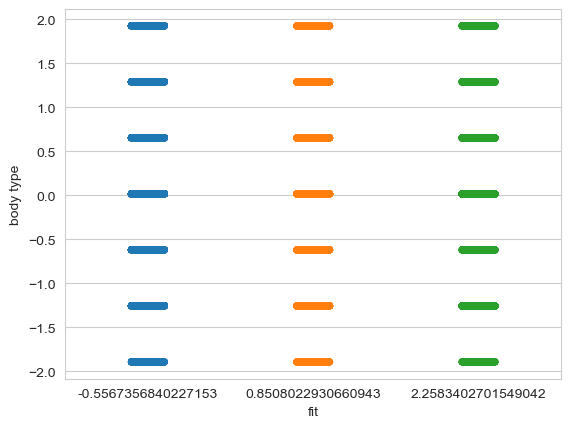

In [98]:
sns.stripplot(scaledds['fit'], scaledds['body type']) ### Concentration of observations

### Visualization and Interpretation of results
In this case study, we have attempted to cluster rented run way dataset using K-means and agglomerative clustering and we also reduced the dimensionality of the dataset using PCA.
We came up with 3 clusters using K-means and 3 classes using agglomerative clustering.
Although selection of the clusters can be revised using Silhoutte score but for a general introductory part it is okay to visualize the plot (either elbow graph or dendrograms) and come up with a particular clusters size.
Further, also we did the cluster analysis by doing bivariate analysis between fit , category and body type labels labels and different features and understand the characteristics of different groups. 

------
### Happy Learning:)
------